**<h2>Exercise 1:Generation of a Cosine Signal**</h2><br>

A cosine signal $x(t)=A.cos(2\pi f_xt+\phi_0)$ with a frequency of $f_x$=50Hz, an initial phase $\phi_0=45^\circ$  and a constant amplitude of A= 1 shall be generated. The sampling frequency shall be $f_s$= 100 Hz. The observation time span shall be −0.1 s ≤ t<0.1 s.<br>

1.Generate the time vector t using an appropriate NumPy routine.<br>

2.Generate the signal x and plot its amplitude using pyplot from matplotlib. Add a grid to the plot and label the x- and y-axis with “Time [s]” and “Amplitude”. Add the title “Cosine Signal” to the plot. <br>

3.Is the sampling frequency $f_s$ large enough for a perfect reconstruction of the signal? Give an explanation.<br>

4.Change the sampling frequency to $f_s$= 1000 Hz,and compare it with the plot obtained for = 100 Hz.<br>

In [1]:
#importing necessary modules
import numpy as np
import matplotlib.pyplot as plt

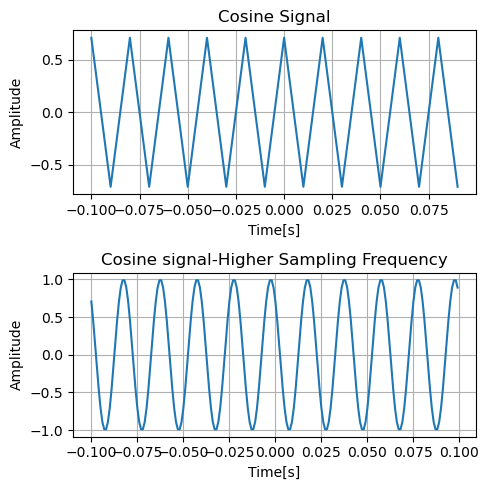

In [8]:
#Exercise 1

fx=50          #Carrier Frequency (Hertz)
fs=100         #Sampling Frequency (Hertz)
A=1            #Amplitude
phi_0=np.pi/4  #Initial Phase
Ts=1/fs

#1.1 Generating Time vector

t=np.arange(-0.1,0.1,Ts)

#1.2 Generating signal and plotting its amplitude
x=A*np.cos(2*np.pi*fx*t+phi_0)
plt.figure(figsize=(5,5))
plt.subplot(2,1,1)
plt.plot(t,x)
plt.xlabel("Time[s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.title("Cosine Signal")

#1.3 
"""Sampling with frequency =100 Hz  theoretically satisfies the Nyquist Criterion fs>= 2*f_x.
But however in practice larger sampling frequency is required (of order 4*f_x or 5*f_x)"""

#1.4 Sampling with the frequency 1000Hz where the perfect reconstruction is almost visible
fs2=1000
Ts2=1/fs2
t2=np.arange(-0.1,0.1,Ts2)
x2=A*np.cos(2*np.pi*fx*t2+phi_0)
plt.subplot(2,1,2)
plt.plot(t2,x2)
plt.xlabel("Time[s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.title("Cosine signal-Higher Sampling Frequency")
plt.tight_layout()
plt.show()


**<h2>Exercise 2: Amplitude Spectrum of a Signal**</h2><br>

1.Generate the amplitude spectrum of the signal from Exercise 1 (signal with $f_s$
=1000 Hz) by using the one-dimensional discrete FFT from NumPy. Generate the frequency vector f and plot the amplitude spectrum. Label the x and y- axis with “Frequency [Hz]” and “Amplitude”. Take care of a correct representation of the spectrum.<br>

2.Now consider the signal from Exercise 1 as analytical complex valued signal 
so that = A⋅exp ($2\pi f_xt+\phi_0$).Plot the real part of the signal and the 
amplitude spectrum of the complex signal. What is the difference to the signal 
from Exercise 1?<br>

3.Plot the Power Spectrum of the signal x(t)

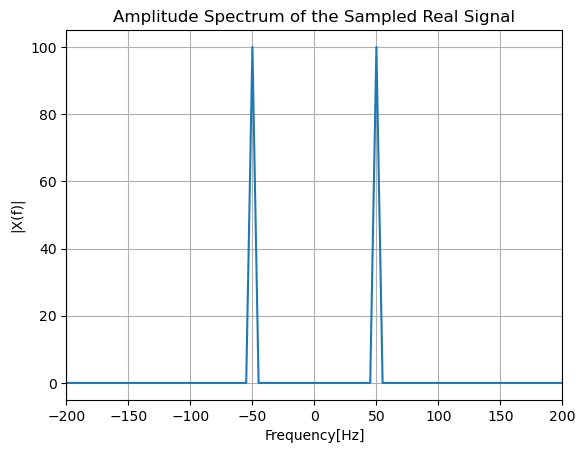

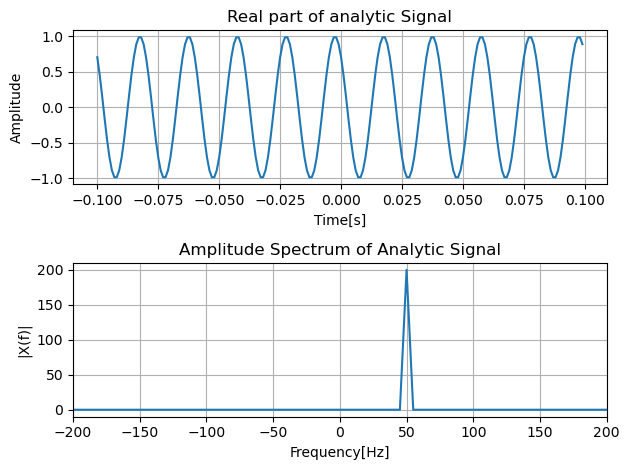

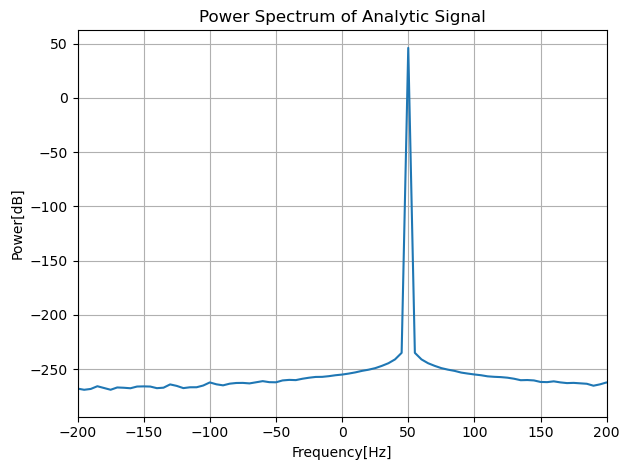

In [25]:
#Exercise 2 

#2.1 Computing FFT and plotting the Amplitude Spectrum 
X2_f=np.fft.fft(x2)
n=X2_f.size
f=np.fft.fftfreq(n,Ts2)
X2_f=np.fft.fftshift(X2_f)
f=np.fft.fftshift(f)
plt.plot(f,np.abs(X2_f))
plt.title("Amplitude Spectrum of the Sampled Real Signal")
plt.xlabel("Frequency[Hz]")
plt.ylabel("|X(f)|")
plt.xlim(-200,200)  
plt.grid(True)

#2.2 Analytic Signal and Amplitude spectrum of Analytic Signal
x2_complex=A*np.exp(1j*(2*np.pi*fx*t2+phi_0))
fig,[ax1,ax2]=plt.subplots(2,1)
ax1.plot(t2,np.real(x2_complex))
ax1.set_xlabel("Time[s]")
ax1.set_ylabel("Amplitude")
ax1.set_title("Real part of analytic Signal")
ax1.grid(True)
X2c_f=np.fft.fftshift(np.fft.fft(x2_complex))
n2c=X2c_f.size
fc=np.fft.fftshift(np.fft.fftfreq(n2c,Ts2))
ax2.plot(fc,np.abs(X2c_f))
ax2.set_xlabel("Frequency[Hz]")
ax2.set_ylabel("|X(f)|")
ax2.set_title("Amplitude Spectrum of Analytic Signal")
ax2.set_xlim(-200,200)
ax2.grid()
plt.tight_layout()
plt.show()
"""The signal from Exercise 1 was a real valued signal which has two peaks in its Frequency domain at both f=fx and f=-fx
but the signal here is a complex signal we get only one peak in the frequency domain with the amplitude is the addition of 
both the amplitudes (in real signal)200=100(-fx)+100(fx)"""
#2.3 Power Spectrum of the Analytic Signal and plotting in dB scale
P=np.absolute(X2c_f*np.conj(X2c_f))
P_dB=10*np.log10(P)
plt.plot(f,P_dB)
plt.xlabel("Frequency[Hz]")
plt.ylabel("Power[dB]")
plt.title("Power Spectrum of Analytic Signal")
plt.xlim(-200,200)
plt.grid(True)
plt.tight_layout()
plt.show()


**<h2>Exercise 3 :Signal Composed of Different Frequencies**</h2><br>

1.Generate the following signal using routines from the numpy library (consider a 
sampling frequency of $f_s$= 400 Hz)
$$
x(t) = 
\begin{cases} 
\exp(j2\pi10t) & 0 \leq t < 5 \, \text{s} \\
\exp(j2\pi25t) & 5 \leq t < 10 \, \text{s} \\
\exp(j2\pi50t) & 10 \leq t < 15 \, \text{s} \\
\exp(j2\pi100t) & 15 \leq t < 20 \, \text{s}
\end{cases}
$$
<br>

2.Generate and plot the time signal and the amplitude spectrum using the one
dimensional discrete FFT from NumPy.<br>

3.Generate and plot the spectrogram of the signal using the STFT or
 SPECTROGRAM routine from the signal library of SciPy. Use the STFT with
 window sizes corresponding to 25, 125, 375 and 1000 ms. Use pcolormesh
 from the pyplot library of matplotlib for visualization. Take care of the correct
 representation of the result!<br>

4.How do you interpret the results? What is the difference to the conventional
 FFT?



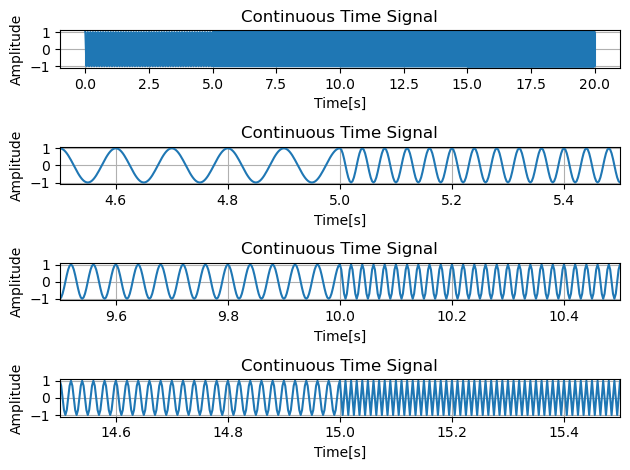

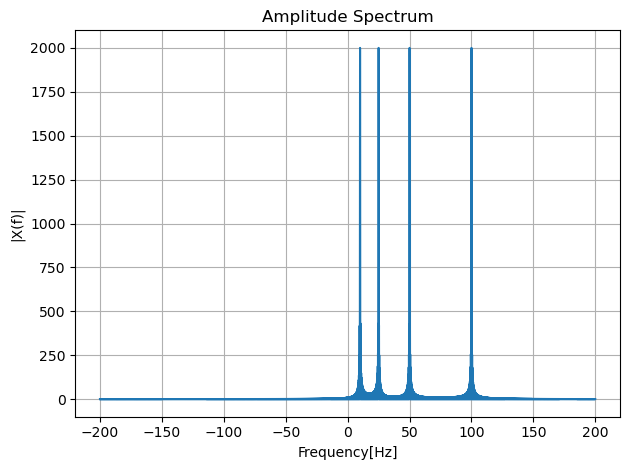

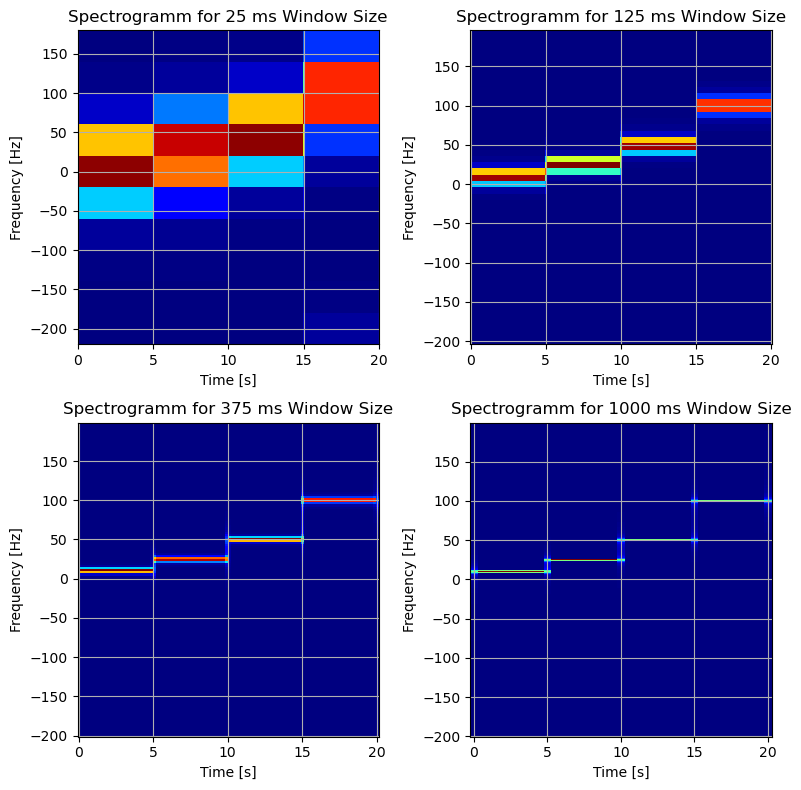

In [36]:
#Exercise 3 
# 3.1 Signal Composed of different frequencies
fs=400
Ts=1/fs
t=np.arange(0,20,Ts)
ns=t.size
x=np.zeros(ns,dtype=complex)
x1 = np.exp(1j*2.0*np.pi*10.0*t)
x2 = np.exp(1j*2.0*np.pi*25.0*t)
x3 = np.exp(1j*2.0*np.pi*50.0*t)
x4 = np.exp(1j*2.0*np.pi*100.0*t)
T=1/fs
ind1 = np.where(t<5)[0][-1]  
ind2 = np.where(t<10)[0][-1]
ind3 = np.where(t<15)[0][-1]
x[0:ind1+1] = x1[0:ind1+1]
x[ind1+1:ind2+1] = x2[ind1+1:ind2+1]
x[ind2+1:ind3+1] = x3[ind2+1:ind3+1]
x[ind3+1:ns] = x4[ind3+1:ns]

#3.2 Plotting the time signal and Amplitude Spectrum
fig,[ax1,ax2,ax3,ax4]=plt.subplots(4,1)
ax1.plot(t,np.real(x))
ax1.set_xlabel("Time[s]")
ax1.set_ylabel("Amplitude")
ax1.set_title("Continuous Time Signal")
ax1.grid()
#Zooming in to show the behaviour
ax2.plot(t,np.real(x))
ax2.set_xlabel("Time[s]")
ax2.set_ylabel("Amplitude")
ax2.set_title("Continuous Time Signal")
ax2.set_xlim(4.5,5.5)
ax2.grid()
ax3.plot(t,np.real(x))
ax3.set_xlabel("Time[s]")
ax3.set_ylabel("Amplitude")
ax3.set_title("Continuous Time Signal")
ax3.set_xlim(9.5,10.5)
ax3.grid()
ax4.plot(t,np.real(x))
ax4.set_xlabel("Time[s]")
ax4.set_ylabel("Amplitude")
ax4.set_title("Continuous Time Signal")
ax4.set_xlim(14.5,15.5) 
ax4.grid()  
plt.tight_layout()
plt.show()                       


X_f=np.fft.fftshift(np.fft.fft(x))
n=X_f.size
f=np.fft.fftshift(np.fft.fftfreq(n,Ts))
plt.plot(f,np.abs(X_f))
plt.xlabel("Frequency[Hz]")
plt.ylabel("|X(f)|")
plt.title("Amplitude Spectrum")
plt.grid(True)

plt.tight_layout()
plt.show()

#3.3 Plot the Spectrogram
from scipy.signal import stft

#Computing Window Sizes
w1 = int(np.rint(25e-3/Ts))   
w2 = int(np.rint(125e-3/Ts))
w3 = int(np.rint(375e-3/Ts))
w4 = int(np.rint(1000e-3/Ts))

f1,t1,spec1 = stft(x,fs,nperseg=w1,return_onesided=False)
f2,t2,spec2 = stft(x,fs,nperseg=w2,return_onesided=False)
f3,t3,spec3 = stft(x,fs,nperseg=w3,return_onesided=False)
f4,t4,spec4 = stft(x,fs,nperseg=w4,return_onesided=False)

fig,axs=plt.subplots(2,2,figsize=(8,8))
axs[0,0].pcolormesh(t1,np.fft.fftshift(f1),np.fft.fftshift(np.abs(spec1),axes=0), cmap='jet', shading='auto')
axs[0,0].set_title("Spectrogramm for 25 ms Window Size")
axs[0,0].set_ylabel("Frequency [Hz]")
axs[0,0].set_xlabel("Time [s]")
axs[0,0].grid()
axs[0,1].pcolormesh(t2,np.fft.fftshift(f2),np.fft.fftshift(np.abs(spec2),axes=0), cmap='jet', shading='auto')
axs[0,1].set_title("Spectrogramm for 125 ms Window Size")
axs[0,1].set_ylabel("Frequency [Hz]")
axs[0,1].set_xlabel("Time [s]")
axs[0,1].grid()
axs[1,0].pcolormesh(t3,np.fft.fftshift(f3),np.fft.fftshift(np.abs(spec3),axes=0), cmap='jet', shading='auto')
axs[1,0].set_title("Spectrogramm for 375 ms Window Size")
axs[1,0].set_ylabel("Frequency [Hz]")
axs[1,0].set_xlabel("Time [s]")
axs[1,0].grid()
axs[1,1].pcolormesh(t4,np.fft.fftshift(f4),np.fft.fftshift(np.abs(spec4),axes=0), cmap='jet', shading='auto')
axs[1,1].set_title("Spectrogramm for 1000 ms Window Size")
axs[1,1].set_ylabel("Frequency [Hz]")
axs[1,1].set_xlabel("Time [s]")
axs[1,1].grid()

plt.tight_layout()
plt.show()


#3.4 Interpretation of the Result
"""
Good time resolution leads to poor frequency resolution and vice versa.
In contrast to Fourier transform the short-time Fourier transform allows also to investigate the
frequency behaviour of a signal over time.
"""




**<h2>Exercise 4 :LFM Signal Generation**</h2><br>

1.Generate a LFM baseband signal  $
  p_B(\tau) = \text{rect}\left(\frac{\tau}{\tau_p}\right) \cdot \exp\left(j\pi \frac{B_r}{\tau_p} \tau^2 \right)
$ with the following parameters:<br>
  - Chirp duration = 5 μs
  - Chirp bandwidth = 150 MHz
  - Sampling frequency = 170 MHz
  - Observation time −7.5 μs < ≤ 7.5 μs<br>

2.Plot the real part of the signal.<br>

3.Plot the amplitude spectrum of the LFM signal.<br>

4.Plot the spectrogram of the LFM signal using STFT. Chose an appropriate window length and overlap<br>


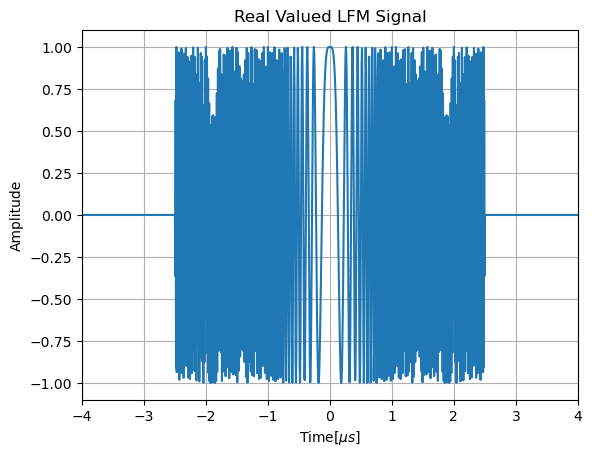

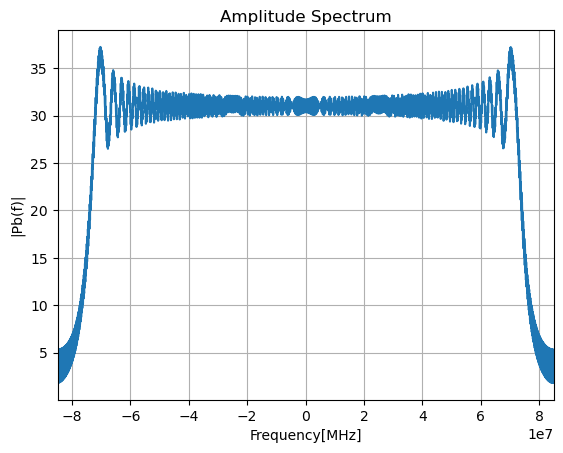

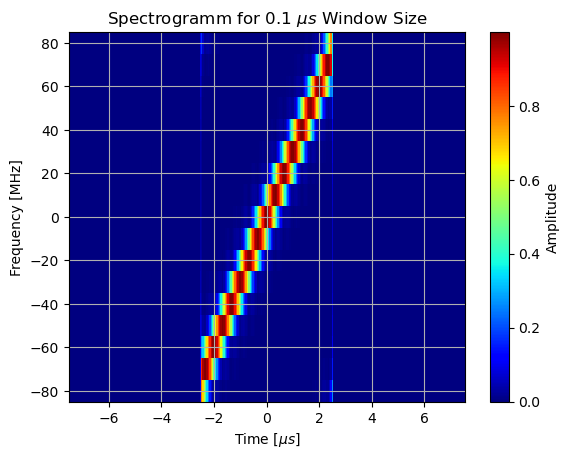

In [62]:
#Excercise 4 
# 4.1 Generating the LFM Signal
tau_p=5e-6
B_r=150e6
fs=170e6
Ts=1/fs
tau=np.arange(-7.5e-6,7.5e-6,Ts)
rect_tau=np.where(np.abs(tau)<=tau_p/2,1,0)
chirp_tau=np.exp(1j*(np.pi*(B_r/tau_p)*tau**2))
pb_tau=rect_tau*chirp_tau

#4.2 Plotting the real part of the signal
plt.plot(tau*1e6,np.real(pb_tau))
plt.xlabel("Time[$\mu s$]")
plt.ylabel("Amplitude")
plt.title("Real Valued LFM Signal")
plt.grid(True)
plt.xlim(-4,4)
plt.show()

#4.3 Plotting the Amplitude Spectrum of the LFM signal
pb_f=np.fft.fftshift(np.fft.fft(pb_tau))
N=pb_f.size
f=np.fft.fftshift(np.fft.fftfreq(N,Ts))
plt.plot(f,np.abs(pb_f))
plt.xlabel("Frequency[MHz]")
plt.ylabel("|Pb(f)|")
plt.title("Amplitude Spectrum")
plt.grid(True)
plt.xlim(f[0],f[-1])
plt.show()

#4.4 Plotting the Spectrogram of LFM Signal
w=int(np.rint(1e-7/Ts))
f,t,spec=stft(pb_tau,fs,nperseg=w,noverlap=int(np.rint(w/2)),return_onesided=False)
plt.pcolormesh((t+tau[0])/1e-6,np.fft.fftshift(f)/1e6,np.fft.fftshift(np.abs(spec),axes=0), cmap='jet', shading='auto')
plt.title("Spectrogramm for 0.1 $\mu s$ Window Size")
plt.ylabel("Frequency [MHz]")
plt.xlabel("Time [$\mu s$]")
plt.colorbar(label='Amplitude') 
plt.grid(True)
plt.show()



# Exercise 5: Pulse Compression

Pulse compression can be carried out by convolving a signal with a reference signal. To achieve the maximum signal-to-noise ratio (SNR) after pulse compression, the reference signal has to be conjugate complex and time-inverted representation of the received signal ($\approx$ delayed and attenuated version of transmitted signal). 

1. Perform pulse compression by using the convolution routine from NumPy. As signal use 𝑝_B (𝜏) from Exercise 4, as reference signal is $ℎ(\tau)=𝑝_\mathrm{B}^∗(−\tau)$. The compressed signal is then obtained by
$$
𝑖(\tau)=𝑝_\mathrm{B}(\tau)∗ℎ(\tau)=\int{𝑝_\mathrm{B}(𝑡)\cdotℎ(\tau−𝑡)\cdot 𝑑𝑡}
$$
2. Plot the real part of the compressed signal, the amplitude spectrum and the spectrogram. What changed compared to Exercise 4?


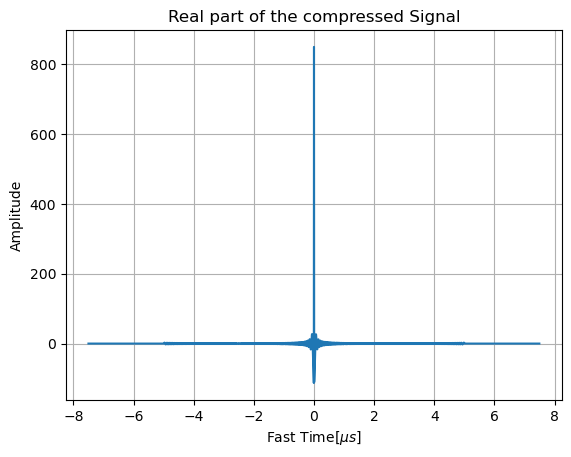

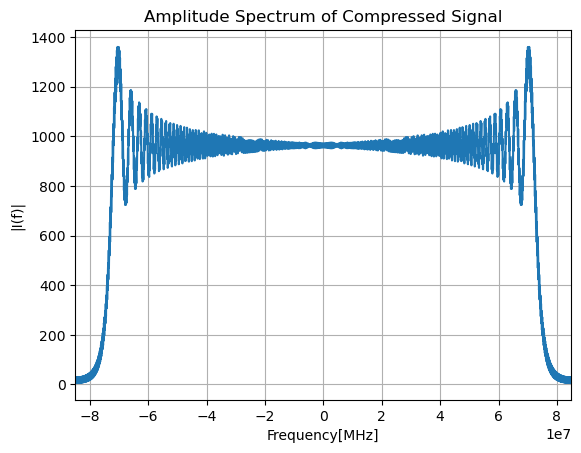

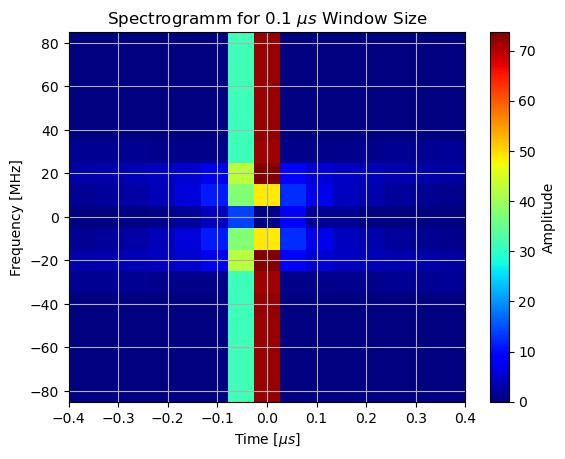

In [75]:
#Exercise 5
#5.1 Performing Pulse Compression
h_tau=np.conj(pb_tau)
h_f=np.fft.fftshift(np.fft.fft(h_tau))
N_h=h_f.size
fh=np.fft.fftshift(np.fft.fftfreq(N_h,Ts))
i_f=pb_f*h_f
N_i=i_f.size
fi=np.fft.fftshift(np.fft.fftfreq(N_i,Ts))
i_tau=np.fft.fftshift(np.fft.ifft(i_f))

#5.2 Plotting real part,Amplitude Spectrum and Spectrogram
plt.plot(tau*1e6,np.real(i_tau))
plt.xlabel("Fast Time[$\mu s$]")
plt.ylabel("Amplitude")
plt.title("Real part of the compressed Signal")
plt.grid(True)
plt.show()

plt.plot(fi,np.abs(i_f))
plt.xlabel("Frequency[MHz]")
plt.ylabel("|I(f)|")
plt.title("Amplitude Spectrum of Compressed Signal")
plt.grid(True)
plt.xlim(fi[0],fi[-1])
plt.show()

w_i=int(np.rint(1e-7/Ts))
f_i,t_i,spec_i=stft(i_tau,fs,nperseg=w_i,noverlap=int(np.rint(w_i/2)),return_onesided=False)
plt.pcolormesh((t_i-t_i[-1]/2.0)/1e-6,np.fft.fftshift(f_i)/1e6,np.fft.fftshift(np.abs(spec_i),axes=0),cmap='jet', shading='auto')
plt.colorbar(label='Amplitude')
plt.title("Spectrogramm for 0.1 $\mu s$ Window Size")
plt.ylabel("Frequency [MHz]")
plt.xlabel("Time [$\mu s$]")
plt.grid(True)
plt.xlim(-0.4,0.4)
plt.show()


# Exercise 6: 2D/3D Visualization of Data

The following function depending on two variables shall be generated:
$$
𝑧(𝑥,𝑦)=\frac{\sin⁡(𝑥^2+𝑦^2)}{𝑥^2+𝑦^2},\,−5\le 𝑥\le 5\;\mathrm{and}\,−5\le 𝑦\le 5
$$
The step size of the vectors 𝑥 and 𝑦 shall be 0.1. For generating the vectors use an appropriate NumPy routine.
1. Generate $𝑧(𝑥,𝑦)$ using the classical way, i.e., by using two interleaved FOR loops. Display the result in a countour plot (use contour or contour from matplotlib.pyplot)
2. Generate 𝑧$(𝑥,𝑦)$ using the meshgrid routine from the NumPy library and display the result again as contour plot. What is the advantage compared to the classical way of signal generation? 
3. Instead of a contour generate a real 3D surface plot using an appropriate routine from matplotlib. 

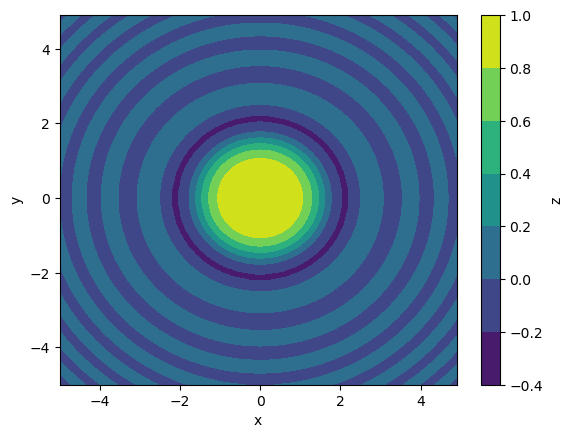

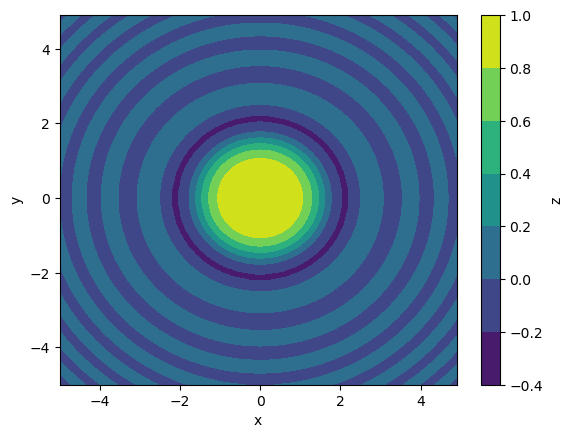

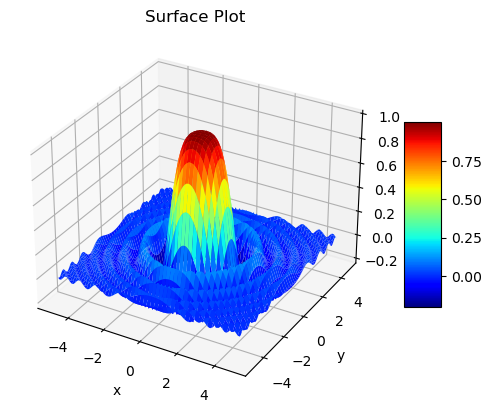

In [79]:
#Exercise 6

#6.1 Generating z using classic for loops and plotting them
x=np.arange(-5,5,0.1)
y=np.arange(-5,5,0.1)
z=np.zeros((x.size,y.size))
for i in range(x.size):
    for j in range(y.size):
        z[i,j]= np.sin(x[i]**2+y[j]**2)/(x[i]**2+y[j]**2)
plt.contourf(x,y,z)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='z')
plt.show()

#6.2 Using meshgrid
xx, yy = np.meshgrid(x,y,sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)

plt.contourf(x,y,z)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='z')
plt.show()
"""Advantage of meshgrid is there is no usage of for loops and the execution time is faster."""

#6.3 Plotting Using Surface Plots
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xx,yy,z,cmap='jet',linewidth=0.1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Surface Plot')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()